### Newton-Raphson Method

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f
    # using the Newton Raphson method
    # recursive implementation
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

if __name__ == '__main__':
 
 	f = lambda x: x ** 3 - 2
f_prime = lambda x: 3 * (x ** 3) 
estimate = my_newton(f, f_prime, 1.5, 1e-6)
    
print("estimate =", estimate)
print("sqrt(2) =", np.cbrt(2))

estimate = 1.2599211899657883
sqrt(2) = 1.2599210498948732


### Bisection Method

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

def my_bisection(f, a, b, tol):
    # approximates a root, R, of f bounded
    # by a and b to within tolerance
    # | f(m) | < tol with m the midpoint
    # between a and b Recursive implementation

    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
            "The scalars a and b do not bound a root")

    # get midpoint
    m = (a + b) / 2

    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a.
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b.
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)
if __name__ == '__main__':
    f = lambda x: x ** 2 - 2

    r1 = my_bisection(f, 0, 2, 0.001)
    print("r1 =", r1)
    print("sqrt(2) =", np.sqrt(2))

r1 = 1.4140625
sqrt(2) = 1.4142135623730951


### FDM(Finite Difference Method)

1. 어려운 미분방정식을 차분방정식(Difference equation)으로 바꿈
2. 차분방정식을 연립방정식 형태로 전환하여, 해당 연립방정식을 푸는 방법

#### 1계 상미분 방정식

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def first_ode_test():
    # Solve:
    # f'(x) + p f(x) = q, f(0)= r 
    
    p, q, r = 3, 2, 1
    x_min, x_max = 0, 10
    Nsteps = 10_000
    x = np.linspace(x_min, x_max, Nsteps + 1)
    sol = q / p + (r - q / p) * np.exp(-p * x)

    h = x[1] - x[0]
    u = np.zeros(Nsteps + 1)
    v = np.zeros(Nsteps + 1)
    u[0] = r
    v[0] = r
    for i in range(Nsteps):
        u[i + 1] = q * h - (p * h - 1) * u[i]
        v[i + 1] = 1 / (1 + p * h) * (v[i] + q * h)
    plt.plot(x, sol, label='exact solution')
    plt.plot(x, u, label='forward FDM')
    plt.plot(x, v, label='backward FDM')
    plt.legend()
    plt.show()

    print('maximum difference between exact sol and forward  FDM: {:.3f} '.format(np.max(abs(sol - u))))
    print('maximum difference between exact sol and backward FDM: {:.3f} '.format(np.max(abs(sol - v))))

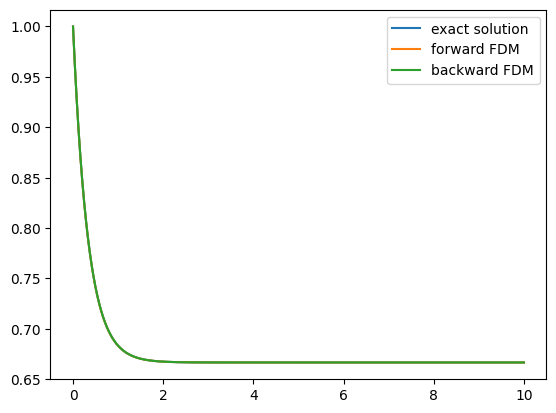

maximum difference between exact sol and forward  FDM: 0.000 
maximum difference between exact sol and backward FDM: 0.000 


In [10]:
first_ode_test()

#### 2계 상미분 방정식

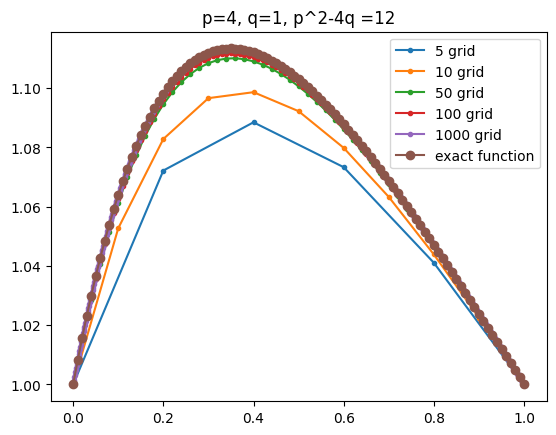

In [11]:
def second_ode_test_explicit():
    # solve:
    # f''(x) + p f'(x) + q =0 , f(0)=y0, f(1)= y1

    p, q = 4, 1             # 미분방정식의 계수 세팅
    y0, y1 = 1, 1           # 초기조건 세팅
    disc = p ** 2 - 4 * q   # 판별식 계산
    Nsteps = 100
    x = np.linspace(0, 1, Nsteps + 1) # exact solution을 위한 x좌표 격자화

    if disc > 0:
        a1 = (-p + np.sqrt(disc)) / 2
        a2 = (-p - np.sqrt(disc)) / 2
        f1 = np.exp(a1 * x)
        f2 = np.exp(a2 * x)
        c1 = (np.exp(a2) * y0 - y1) / (np.exp(a2) - np.exp(a1))
        c2 = (-np.exp(a1) * y0 + y1) / (np.exp(a2) - np.exp(a1))
        y_exact = c1 * f1 + c2 * f2

    elif disc == 0:
        a = -p / 2
        f1 = np.exp(a * x)
        f2 = x * np.exp(a * x)
        c1 = y0
        c2 = y1 * np.exp(-a) - y0
        y_exact = c1 * f1 + c2 * f2

    else:
        z1 = -p / 2
        z2 = np.sqrt(-disc) / 2
        f1 = np.exp(z1 * x) * np.cos(z2 * x)
        f2 = np.exp(z1 * x) * np.sin(z2 * x)
        c1 = y0
        c2 = y1 / (np.exp(z1) * np.sin(z2)) - y0 / np.tan(z2)
        y_exact = c1 * f1 + c2 * f2

    ##### FDM ##################
    nMesh = [5, 10, 50, 100, 1000]
    for i in range(len(nMesh)):
        xgrid = np.linspace(0, 1, nMesh[i] + 1)
        h = xgrid[1] - xgrid[0]

        u = np.zeros(nMesh[i] + 1)

        T = np.zeros((nMesh[i] - 1, nMesh[i] - 1))
        for j in range(nMesh[i] - 1):
            T[j, j] = -(2 / h ** 2 + p / h - q)
            if j + 1 < nMesh[i] - 1:
                T[j + 1, j] = 1 / h ** 2
                T[j, j + 1] = 1 / h ** 2 + p / h

        known = np.zeros(nMesh[i] - 1)
        known[0] = -1 / h ** 2 * y0
        known[-1] = -(1 / h ** 2 + p / h) * y1

        u[1:nMesh[i]] = np.linalg.inv(T) @ known
        u[0], u[nMesh[i]] = y0, y1
        plt.plot(xgrid, u, marker='.', label='{} grid'.format(nMesh[i]))

    plt.plot(x, y_exact, marker='o', label='exact function')
    plt.legend()
    plt.title('p={}, q={}, p^2-4q ={}'.format(p, q, disc))
    plt.show()
    
    
if __name__ == '__main__':
    second_ode_test_explicit()

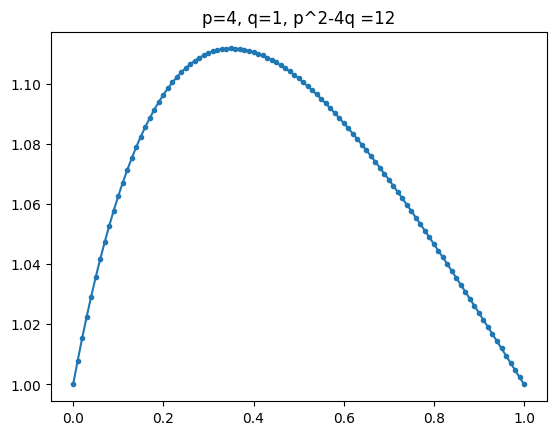

In [13]:
def second_ode(n):
    n = 100
    p, q = 4, 1
    y0, y1 = 1, 1
    disc = p ** 2 - 4 * q

    xgrid = np.linspace(0, 1, n + 1)
    h = xgrid[1] - xgrid[0]

    u = np.zeros(n + 1)

    T = np.zeros((n - 1, n - 1))
    for j in range(n - 1):
        T[j, j] = -(2 / h ** 2 + p / h - q)
        if j + 1 < n - 1:
            T[j + 1, j] = 1 / h ** 2
            T[j, j + 1] = 1 / h ** 2 + p / h

    known = np.zeros(n - 1)
    known[0] = -1 / h ** 2 * y0
    known[-1] = -(1 / h ** 2 + p / h) * y1

    u[1:n] = np.linalg.inv(T) @ known
    u[0], u[n] = y0, y1
    plt.plot(xgrid, u, marker='.', label='{} grid'.format(n))
    plt.title('p={}, q={}, p^2-4q ={}'.format(p, q, disc))

second_ode(100)

#### FDM for Heat Equation

In [15]:
def Solve_HeatEqaution_1D_explicit():
    # u_t(t,x) = u_xx(t,x) 0<x<1, t>0
    # u(0,x) = sin(πx)
    # u(t,0)= u(t,1) =0
    # closed form solution : u(t,x)= sin(πx)exp(-π^2 t)

    x_min, x_max = 0, 1
    t0 = 0
    maturity = 1

    num_x, num_t = 50, 10000
    # num_x, num_t = 50, 4500
    # num_x, num_t = 70, 10000
    # num_x, num_t = 80, 10000

    x_seq = np.linspace(x_min, x_max, num_x + 1)
    t_seq = np.linspace(t0, maturity, num_t + 1)

    h = x_seq[1] - x_seq[0]
    k = t_seq[1] - t_seq[0]

    alpha = k / h ** 2

    print('delta of x : {:.3f}'.format(k))
    print('delta of t : {:.3f}'.format(h))
    print('alpha (= k/(h^2)) : {:.3f}'.format(alpha))

    u = np.empty((num_t + 1, num_x + 1))
    # print(u)

    # u(t,x_min) =0
    u[:, 0] = 0

    # u(t, x_max) =0
    u[:, -1] = 0

    # u(0, x) = sin( pi*x)
    u[0, :] = np.sin(np.pi * x_seq)

    for n in range(0, num_t):
        for j in range(1, num_x):
            u[n + 1, j] = u[n, j] + alpha * (u[n, j + 1] - 2 * u[n, j] + u[n, j - 1])

    real_t = t_seq[-1]
    sol = np.sin(np.pi * x_seq) * np.exp(-np.pi * np.pi * real_t)
    fdm_sol = u[-1, :]

    max_of_difference = np.max(sol - fdm_sol)
    print('max distance between exact solution and fdm solution is {:.4f}'.format(max_of_difference))

    print()
    plt.plot(x_seq, sol, 'b', label='exact solution')
    plt.plot(x_seq, fdm_sol, 'm', label='fdm solution')
    plt.legend()
    plt.title('when h={:.3f}, k={:.3f}, alpha={:.3f}'.format(h, k, alpha))
    plt.show()

delta of x : 0.000
delta of t : 0.020
alpha (= k/(h^2)) : 0.250
max distance between exact solution and fdm solution is 0.0000



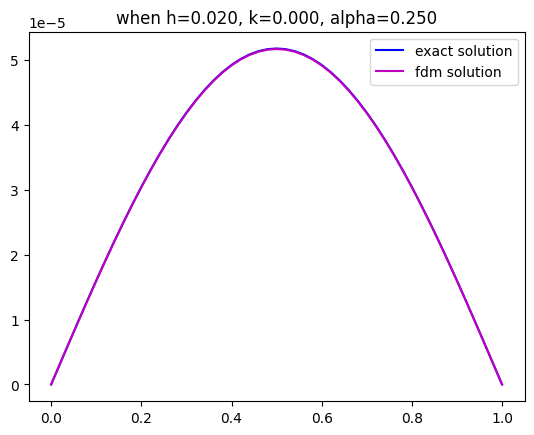

In [16]:
Solve_HeatEqaution_1D_explicit()

그런에 위의 방법을 사용하면, $\alpha$값에 따라 계산이 뻑나는 경우가 생길 수도 있다고 함. 그래서 모델을 더 발전시켜 나갈것임

$$
cf)\qquad \alpha = {k \over h^2}
$$

delta of x : 0.000
delta of t : 0.020
alpha (= k/(h^2)) : 0.250
max distance between exact solution and fdm solution is 0.0000


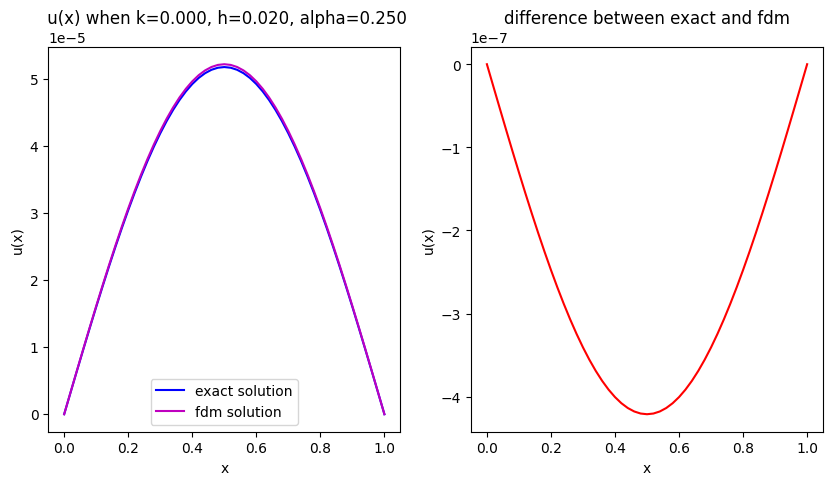

In [19]:
def Solve_HeatEqaution_1D_implicit():
    # u_t(t,x) = u_xx(t,x) 0<x<1, t>0
    # u(0,x) = sin(πx)
    # u(t,0)= u(t,1) =0
    # closed form solution : u(t,x)= sin(πx)exp(-π^2 t)

    x_min, x_max = 0, 1
    t0 = 0
    maturity = 1

    num_x, num_t = 50, 10000
    # num_x, num_t = 50, 4500
    # num_x, num_t = 70, 10000
    # num_x, num_t = 80, 10000

    x_seq = np.linspace(x_min, x_max, num_x + 1)
    t_seq = np.linspace(t0, maturity, num_t + 1)

    h = x_seq[1] - x_seq[0]
    k = t_seq[1] - t_seq[0]

    alpha = k / h ** 2

    print('delta of x : {:.3f}'.format(k))
    print('delta of t : {:.3f}'.format(h))
    print('alpha (= k/(h^2)) : {:.3f}'.format(alpha))

    u = np.empty((num_t + 1, num_x + 1))

    # u(t,x_min) =0
    u[:, 0] = 0

    # u(t, x_max) =0
    u[:, -1] = 0

    # u(0, x) = sin( pi*x)
    u[0, :] = np.sin(np.pi * x_seq)

    # construct coeff matrix : num_x -1 Size
    diag = np.ones(num_x - 1) * (1 + 2 * alpha)
    under = np.ones(num_x - 1) * (-alpha)
    over = np.ones(num_x - 1) * (-alpha)

    for n in range(num_t):
        known = u[n, 1:num_x]
        unknown = thomas(under, diag, over, known)
        u[n + 1, 1:num_x] = unknown

    t_idx = -1
    real_t = t_seq[t_idx]

    sol = np.sin(np.pi * x_seq) * np.exp(-np.pi * np.pi * real_t)
    fdm_sol = u[t_idx, :]

    max_of_difference = np.max(sol - fdm_sol)
    print('max distance between exact solution and fdm solution is {:.4f}'.format(max_of_difference))

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].plot(x_seq, sol, 'b', label='exact solution')
    axes[0].plot(x_seq, fdm_sol, 'm', label='fdm solution')
    axes[0].set_title(' u(x) when k={:.3f}, h={:.3f}, alpha={:.3f}'.format(k, h, alpha))
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('u(x)')
    axes[0].legend()

    axes[1].plot(x_seq, sol - fdm_sol, 'r')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('u(x)')
    axes[1].set_title('difference between exact and fdm')

    plt.show()
    
# Function for TMDA Algorithm
def thomas(a, b, c, d):
    """ A is the tridiagnonal coefficient matrix and d is the RHS matrix"""
    """
    a is lower diagonal a2,a3,..,a_N, meaning
    b is diagonal b1,b2,b3,..,b_N meaning
    c is upper diagonal c1,c2,c3,.. c_{N-1} meaning
    """
    N = len(a)
    cp = np.zeros(N, dtype='float64')  # store tranformed c or c'
    dp = np.zeros(N, dtype='float64')  # store transformed d or d'
    X = np.zeros(N, dtype='float64')  # store unknown coefficients

    # Perform Forward Sweep
    # Equation 1 indexed as 0 in python
    cp[0] = c[0] / b[0]
    dp[0] = d[0] / b[0]
    # Equation 2, ..., N (indexed 1 - N-1 in Python)
    for i in np.arange(1, (N), 1):
        dnum = b[i] - a[i] * cp[i - 1]
        cp[i] = c[i] / dnum
        dp[i] = (d[i] - a[i] * dp[i - 1]) / dnum

    # Perform Back Substitution
    X[(N - 1)] = dp[N - 1]  # Obtain last xn

    for i in np.arange((N - 2), -1, -1):  # use x[i+1] to obtain x[i]
        X[i] = (dp[i]) - (cp[i]) * (X[i + 1])

    return (X)


if __name__ == '__main__':
    Solve_HeatEqaution_1D_implicit()

backward differenec로 두면 알파값 신경 안쓰고 추정할 수 있음. 그래서 이걸 함축적 방법이라고 부름.

근데 코드 보면 알겠지만, 계산량이 너무 많음. 행렬방정식을 풀어야하고, 3중대각행렬을 푸는 알고리즘도 들어가있음. 

그래서 여기서도 Trade-off가 발생. 알파값 따라 생각해볼 문제가 될듯!

+) 이거 써서 BS는 못푸나